In [102]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression, Lasso, Ridge

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 1. Problem Statement

# 2. Data Gathering

In [2]:
boston_data = load_boston()
dir(boston_data)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

In [3]:
df = pd.DataFrame(boston_data.data, columns = boston_data.feature_names)
df['Target'] = boston_data.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# 3. EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# 4.  Feature Engineering

# 5. Feature Selection

# 1. Linearity

In [6]:
df.cov()  # Covariance Matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
CRIM,73.986578,-40.215956,23.992339,-0.122109,0.419594,-1.325038,85.405322,-6.876722,46.847761,844.821538,5.399331,-302.381816,27.986168,-30.718508
ZN,-40.215956,543.936814,-85.412648,-0.252925,-1.396148,5.112513,-373.901548,32.629304,-63.348695,-1236.453735,-19.776571,373.721402,-68.783037,77.315176
INDUS,23.992339,-85.412648,47.064442,0.109669,0.607074,-1.887957,124.513903,-10.228097,35.549971,833.360290,5.692104,-223.579756,29.580270,-30.520823
CHAS,-0.122109,-0.252925,0.109669,0.064513,0.002684,0.016285,0.618571,-0.053043,-0.016296,-1.523367,-0.066819,1.131325,-0.097816,0.409409
NOX,0.419594,-1.396148,0.607074,0.002684,0.013428,-0.024603,2.385927,-0.187696,0.616929,13.046286,0.047397,-4.020570,0.488946,-0.455412
RM,-1.325038,5.112513,-1.887957,0.016285,-0.024603,0.493671,-4.751929,0.303663,-1.283815,-34.583448,-0.540763,8.215006,-3.079741,4.493446
AGE,85.405322,-373.901548,124.513903,0.618571,2.385927,-4.751929,792.358399,-44.329379,111.770846,2402.690122,15.936921,-702.940328,121.077725,-97.589017
DIS,-6.876722,32.629304,-10.228097,-0.053043,-0.187696,0.303663,-44.329379,4.434015,-9.068252,-189.664592,-1.059775,56.040356,-7.473329,4.840229
RAD,46.847761,-63.348695,35.549971,-0.016296,0.616929,-1.283815,111.770846,-9.068252,75.816366,1335.756577,8.760716,-353.276219,30.385442,-30.561228
TAX,844.821538,-1236.453735,833.360290,-1.523367,13.046286,-34.583448,2402.690122,-189.664592,1335.756577,28404.759488,168.153141,-6797.911215,654.714520,-726.255716


In [7]:
df.var()

CRIM          73.986578
ZN           543.936814
INDUS         47.064442
CHAS           0.064513
NOX            0.013428
RM             0.493671
AGE          792.358399
DIS            4.434015
RAD           75.816366
TAX        28404.759488
PTRATIO        4.686989
B           8334.752263
LSTAT         50.994760
Target        84.586724
dtype: float64

In [8]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


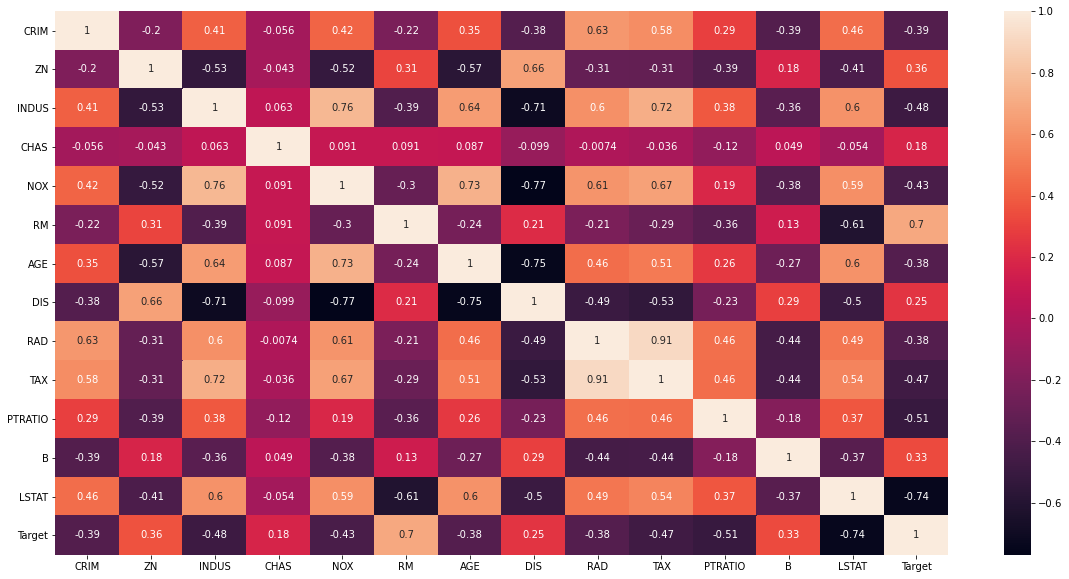

In [9]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot = True)
plt.savefig('Correlation.png')

In [10]:
correlation = df.corr().tail(1)
correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
Target,-0.388305,0.360445,-0.483725,0.17526,-0.427321,0.69536,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663,1.0


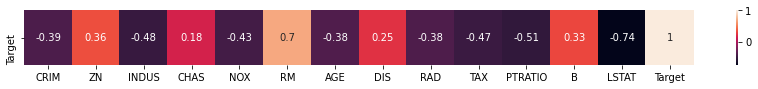

In [11]:
plt.figure(figsize = (15,1))
sns.heatmap(correlation, annot = True)
plt.savefig('Correlation_Target.png')

### How to Handle Linearity if get Violated

#### 1. Log Transformation

In [12]:
df3 = df.copy()
df4 = np.log(df3)
df4.corr().tail(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
Target,-0.567242,0.219731,-0.553887,NaN,-0.515251,0.610437,-0.388498,0.405721,-0.434513,-0.557184,-0.492654,0.34342,-0.82296,1.0


#### 2. SquareRoot Transformation

In [13]:
df3 = df.copy()
df4 = np.sqrt(df3)
df4.corr().tail(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
Target,-0.539106,0.395878,-0.541344,0.168186,-0.479652,0.660919,-0.401809,0.330405,-0.423756,-0.523748,-0.509367,0.361348,-0.816253,1.0


#### 3. CubeRoot Transformation

In [14]:
df3 = df.copy()
df4 = np.cbrt(df3)
df4.corr().tail(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
Target,-0.565883,0.40066,-0.552023,0.165247,-0.493867,0.645864,-0.402445,0.35676,-0.432328,-0.537923,-0.505953,0.363645,-0.82781,1.0


# 2. No Multicolinearity

In [15]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Target'],
      dtype='object')

In [16]:
df.shape[1]

14

In [17]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [18]:
for i in range(df.shape[1]-1):
    vif = variance_inflation_factor(df.to_numpy(),i)
    print(f'VIF for {df.columns[i]}:', vif)

VIF for CRIM: 2.1314042398916397
VIF for ZN: 2.9100040831335896
VIF for INDUS: 14.485874343285056
VIF for CHAS: 1.1762659532928834
VIF for NOX: 74.00426852716569
VIF for RM: 136.1017425464841
VIF for AGE: 21.39886253165994
VIF for DIS: 15.430455486916713
VIF for RAD: 15.369979849775836
VIF for TAX: 61.93971317434026
VIF for PTRATIO: 87.22723281176584
VIF for B: 21.35101506934191
VIF for LSTAT: 12.615187641345385


In [19]:
x = df.drop('Target', axis = 1)
x.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

<AxesSubplot:>

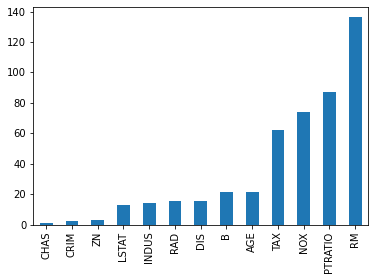

In [20]:
vif_list = []
for i in range(df.shape[1]-1):
    vif = variance_inflation_factor(df.to_numpy(),i)
    vif_list.append(vif)
    
    
s1 = pd.Series(vif_list, index= x.columns)
s1.sort_values().plot(kind = 'bar')

<AxesSubplot:>

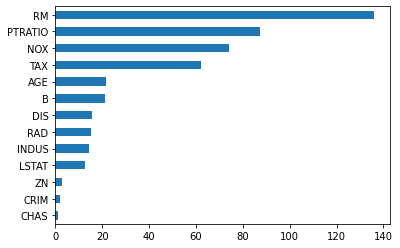

In [21]:
vif_list = []
for i in range(df.shape[1]-1):
    vif = variance_inflation_factor(df.to_numpy(),i)
    vif_list.append(vif)
    
    
s1 = pd.Series(vif_list, index= x.columns)
s1.sort_values().plot(kind = 'barh')

# 6. Model Training

### Train Test and Split

In [22]:
x = df.drop('Target', axis = 1)
y = df['Target']

In [23]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [24]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Target, Length: 506, dtype: float64

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=1)

In [26]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
42,0.14150,0.0,6.91,0.0,0.448,6.169,6.6,5.7209,3.0,233.0,17.9,383.37,5.81
58,0.15445,25.0,5.13,0.0,0.453,6.145,29.2,7.8148,8.0,284.0,19.7,390.68,6.86
385,16.81180,0.0,18.10,0.0,0.700,5.277,98.1,1.4261,24.0,666.0,20.2,396.90,30.81
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34
424,8.79212,0.0,18.10,0.0,0.584,5.565,70.6,2.0635,24.0,666.0,20.2,3.65,17.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.03548,80.0,3.64,0.0,0.392,5.876,19.1,9.2203,1.0,315.0,16.4,395.18,9.25
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
396,5.87205,0.0,18.10,0.0,0.693,6.405,96.0,1.6768,24.0,666.0,20.2,396.90,19.37
235,0.33045,0.0,6.20,0.0,0.507,6.086,61.5,3.6519,8.0,307.0,17.4,376.75,10.88


In [27]:
x_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
307,0.04932,33.0,2.18,0.0,0.472,6.849,70.3,3.1827,7.0,222.0,18.4,396.90,7.53
343,0.02543,55.0,3.78,0.0,0.484,6.696,56.4,5.7321,5.0,370.0,17.6,396.90,7.18
47,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,3.0,233.0,17.9,392.74,18.80
67,0.05789,12.5,6.07,0.0,0.409,5.878,21.4,6.4980,4.0,345.0,18.9,396.21,8.10
362,3.67822,0.0,18.10,0.0,0.770,5.362,96.2,2.1036,24.0,666.0,20.2,380.79,10.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,0.04203,28.0,15.04,0.0,0.464,6.442,53.6,3.6659,4.0,270.0,18.2,395.01,8.16
224,0.31533,0.0,6.20,0.0,0.504,8.266,78.3,2.8944,8.0,307.0,17.4,385.05,4.14
110,0.10793,0.0,8.56,0.0,0.520,6.195,54.4,2.7778,5.0,384.0,20.9,393.49,13.00
426,12.24720,0.0,18.10,0.0,0.584,5.837,59.7,1.9976,24.0,666.0,20.2,24.65,15.69


In [28]:
linear_reg = LinearRegression()
linear_reg.fit(x_train,y_train) # Gradient Descent and best M and C Value

LinearRegression()

In [29]:
linear_reg.coef_

array([-1.12386867e-01,  5.80587074e-02,  1.83593559e-02,  2.12997760e+00,
       -1.95811012e+01,  3.09546166e+00,  4.45265228e-03, -1.50047624e+00,
        3.05358969e-01, -1.11230879e-02, -9.89007562e-01,  7.32130017e-03,
       -5.44644997e-01])

In [30]:
linear_reg.intercept_

42.93352585337697

# Evaluation

In [31]:
y_pred = linear_reg.predict(x_test)
y_pred

array([32.65503184, 28.0934953 , 18.02901829, 21.47671576, 18.8254387 ,
       19.87997758, 32.42014863, 18.06597765, 24.42277848, 27.00977832,
       27.04081017, 28.75196794, 21.15677699, 26.85200196, 23.38835945,
       20.66241266, 17.33082198, 38.24813601, 30.50550873,  8.74436733,
       20.80203902, 16.26328126, 25.21805656, 24.85175752, 31.384365  ,
       10.71311063, 13.80434635, 16.65930389, 36.52625779, 14.66750528,
       21.12114902, 13.95558618, 43.16210242, 17.97539649, 21.80116017,
       20.58294808, 17.59938821, 27.2212319 ,  9.46139365, 19.82963781,
       24.30751863, 21.18528812, 29.57235682, 16.3431752 , 19.31483171,
       14.56343172, 39.20885479, 18.10887551, 25.91223267, 20.33018802,
       25.16282007, 24.42921237, 25.07123258, 26.6603279 ,  4.56151258,
       24.0818735 , 10.88682673, 26.88926656, 16.85598381, 35.88704363,
       19.55733853, 27.51928921, 16.58436103, 18.77551029, 11.13872875,
       32.36392607, 36.72833773, 21.95924582, 24.57949647, 25.14

In [32]:
y_pred[:5]

array([32.65503184, 28.0934953 , 18.02901829, 21.47671576, 18.8254387 ])

In [33]:
y_test[:5]

307    28.2
343    23.9
47     16.6
67     22.0
362    20.8
Name: Target, dtype: float64

# Evaluation on testing Data

In [34]:
mse = mean_squared_error(y_test,y_pred)
print('Mean squared error is :', mse)


rmse = np.sqrt(mse)
print('Root Mean Squared error is :', rmse)

mae = mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error is :', mae)

r2score = r2_score(y_test,y_pred)
print('R Squared value is :', r2score)

Mean squared error is : 23.380836480270045
Root Mean Squared error is : 4.835373458200519
Mean Absolute Error is : 3.7507121808389217
R Squared value is : 0.763417443213849


In [35]:
r_squared = linear_reg.score(x_test,y_test)
print('R squared value is :', r_squared)

R squared value is : 0.763417443213849


# Evaluation on Training Data

In [36]:
y_pred_train = linear_reg.predict(x_train)

In [37]:
# y_pred_train

In [38]:
mse = mean_squared_error(y_train,y_pred_train)
print('Mean squared error is :', mse)


rmse = np.sqrt(mse)
print('Root Mean Squared error is :', rmse)

mae = mean_absolute_error(y_train,y_pred_train)
print('Mean Absolute Error is :', mae)

r2score = r2_score(y_train,y_pred_train)
print('R Squared value is :', r2score)

Mean squared error is : 21.86279471487961
Root Mean Squared error is : 4.675766751547773
Mean Absolute Error is : 3.196196807325736
R Squared value is : 0.7293585058196337


### 1. Assumptions of Linear Regression

# Normality of Residuals

In [41]:
y_train[:5]

42     25.3
58     23.3
385     7.2
78     21.2
424    11.7
Name: Target, dtype: float64

In [42]:
y_pred_train[:5]

array([25.07691032, 21.94177431,  8.36935863, 21.32567191, 15.91001746])

In [43]:
y_train[:5] - y_pred_train[:5]

42     0.223090
58     1.358226
385   -1.169359
78    -0.125672
424   -4.210017
Name: Target, dtype: float64

In [46]:
mse = (((y_train - y_pred_train)**2).sum())/404 # 404 -> number of trainnig rows
mse

21.86279471487961

In [47]:
mae = ((np.abs(y_train - y_pred_train)).sum())/404
mae

3.196196807325736

In [48]:
residuals = y_train[:5] - y_pred_train[:5]
residuals

42     0.223090
58     1.358226
385   -1.169359
78    -0.125672
424   -4.210017
Name: Target, dtype: float64

# 1. Kdeplot

<AxesSubplot:xlabel='Target', ylabel='Density'>

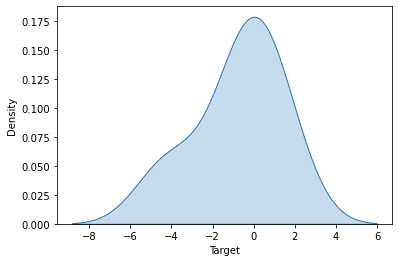

In [49]:
sns.kdeplot(residuals, fill = True)

<AxesSubplot:xlabel='Target', ylabel='Count'>

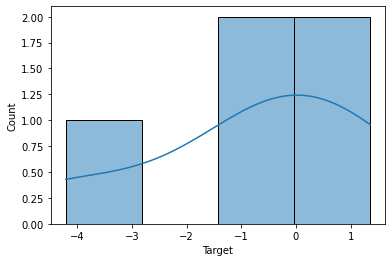

In [50]:
sns.histplot(residuals, kde= True)

<AxesSubplot:ylabel='Count'>

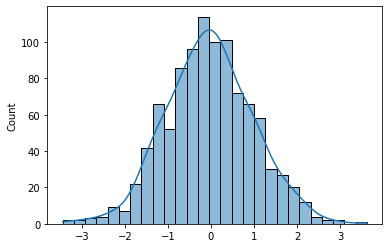

In [51]:
array = np.random.randn(1000)
sns.histplot(array, kde = True)

# 2. QQ - Plot

In [52]:
import statsmodels.api as sm

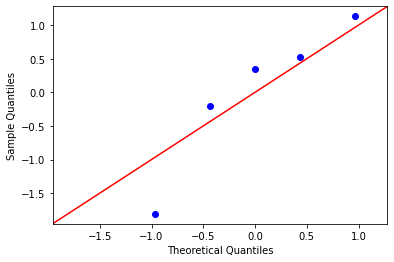

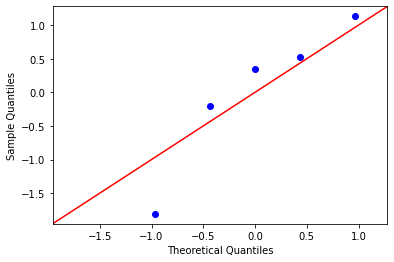

In [53]:
sm.qqplot(residuals, line = '45', fit = True)

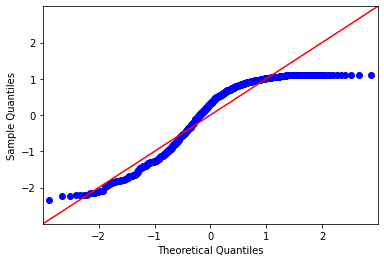

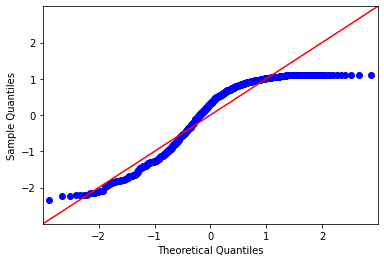

In [54]:
sm.qqplot(df['AGE'], line = '45', fit = True)

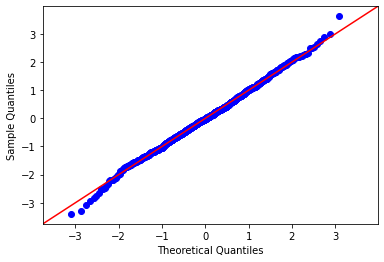

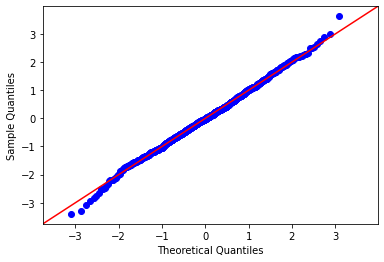

In [55]:
sm.qqplot(array,line = '45', fit = True)

# 3. SkewNess

<AxesSubplot:xlabel='Target', ylabel='Density'>

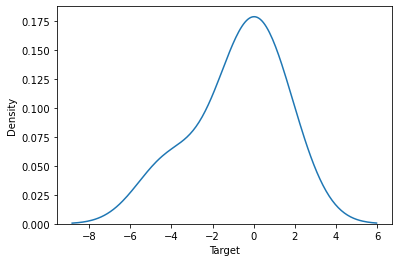

In [56]:
sns.kdeplot(residuals)

In [57]:
residuals.skew()

-1.278058418097404

In [58]:
from scipy.stats import skew

In [59]:
skew(df['AGE'])

-0.5971855948016143

In [60]:
df['AGE'].skew()

-0.5989626398812962

In [63]:
skew(df['LSTAT'])

0.9037707431346133

In [61]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


<AxesSubplot:xlabel='LSTAT', ylabel='Density'>

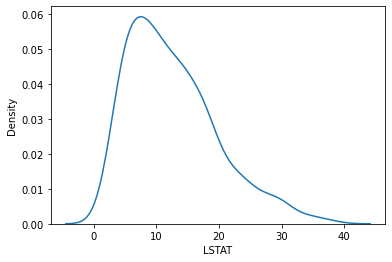

In [62]:
sns.kdeplot(df['LSTAT'])

<AxesSubplot:xlabel='AGE', ylabel='Density'>

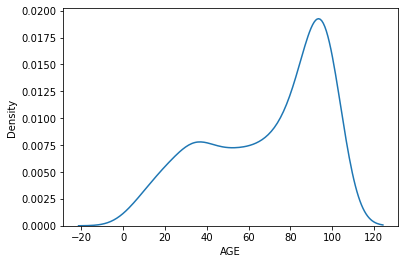

In [64]:
sns.kdeplot(df['AGE'])

# Hypothesis Testing

# 1. Shapiro

In [65]:
from scipy.stats import shapiro

In [66]:
stat, p_val = shapiro(df['AGE'])
p_val

2.230570069931666e-18

In [67]:
_, p_val = shapiro(df['AGE'])
print('P value is :', p_val)

if p_val >= 0.05:
    print('Data is Normally Distributed')
    print('Null hypothesis is True')
    print('We are accepting Null Hypothesis')
    
else:
    print('Data is not Normally Distributed')
    print('Alternate Hypothesis is True')
    print('We are accepting Alternate Hypothesis')

P value is : 2.230570069931666e-18
Data is not Normally Distributed
Alternate Hypothesis is True
We are accepting Alternate Hypothesis


In [68]:
_, p_val = shapiro(df['LSTAT'])
print('P value is :', p_val)

if p_val >= 0.05:
    print('Data is Normally Distributed')
    print('Null hypothesis is True')
    print('We are accepting Null Hypothesis')
    
else:
    print('Data is not Normally Distributed')
    print('Alternate Hypothesis is True')
    print('We are accepting Alternate Hypothesis')

P value is : 8.286120135305927e-14
Data is not Normally Distributed
Alternate Hypothesis is True
We are accepting Alternate Hypothesis


In [69]:
residuals

42     0.223090
58     1.358226
385   -1.169359
78    -0.125672
424   -4.210017
Name: Target, dtype: float64

In [71]:
_, p_val = shapiro(residuals)
print('P value is :', p_val)

if p_val >= 0.05:
    print('Data is Normally Distributed')
    print('Null hypothesis is True')
    print('We are accepting Null Hypothesis')
    
else:
    print('Data is not Normally Distributed')
    print('Alternate Hypothesis is True')
    print('We are accepting Alternate Hypothesis')

P value is : 0.4633122384548187
Data is Normally Distributed
Null hypothesis is True
We are accepting Null Hypothesis


In [72]:
_, p_val = shapiro(array)
print('P value is :', p_val)

if p_val >= 0.05:
    print('Data is Normally Distributed')
    print('Null hypothesis is True')
    print('We are accepting Null Hypothesis')
    
else:
    print('Data is not Normally Distributed')
    print('Alternate Hypothesis is True')
    print('We are accepting Alternate Hypothesis')

P value is : 0.6071268320083618
Data is Normally Distributed
Null hypothesis is True
We are accepting Null Hypothesis


# 2. KsTest

In [74]:
from scipy.stats import kstest

In [76]:
_, p_val = kstest(df['AGE'], 'norm')
print('P value is :', p_val)

if p_val >= 0.05:
    print('Data is Normally Distributed')
    print('Null hypothesis is True')
    print('We are accepting Null Hypothesis')
    
else:
    print('Data is not Normally Distributed')
    print('Alternate Hypothesis is True')
    print('We are accepting Alternate Hypothesis')

P value is : 0.0
Data is not Normally Distributed
Alternate Hypothesis is True
We are accepting Alternate Hypothesis


In [78]:
_, p_val = kstest(df['LSTAT'],'norm')
print('P value is :', p_val)

if p_val >= 0.05:
    print('Data is Normally Distributed')
    print('Null hypothesis is True')
    print('We are accepting Null Hypothesis')
    
else:
    print('Data is not Normally Distributed')
    print('Alternate Hypothesis is True')
    print('We are accepting Alternate Hypothesis')

P value is : 0.0
Data is not Normally Distributed
Alternate Hypothesis is True
We are accepting Alternate Hypothesis


In [80]:
_, p_val = shapiro(array)
print('P value is :', p_val)

if p_val >= 0.05:
    print('Data is Normally Distributed')
    print('Null hypothesis is True')
    print('We are accepting Null Hypothesis')
    
else:
    print('Data is not Normally Distributed')
    print('Alternate Hypothesis is True')
    print('We are accepting Alternate Hypothesis')

P value is : 0.6071268320083618
Data is Normally Distributed
Null hypothesis is True
We are accepting Null Hypothesis


# 3. Normal Test

In [81]:
from scipy.stats import normaltest

In [82]:
_, p_val = normaltest(df['AGE'])
print('P value is :', p_val)

if p_val >= 0.05:
    print('Data is Normally Distributed')
    print('Null hypothesis is True')
    print('We are accepting Null Hypothesis')
    
else:
    print('Data is not Normally Distributed')
    print('Alternate Hypothesis is True')
    print('We are accepting Alternate Hypothesis')

P value is : 1.6191768966045395e-25
Data is not Normally Distributed
Alternate Hypothesis is True
We are accepting Alternate Hypothesis


In [83]:
_, p_val = normaltest(df['LSTAT'])
print('P value is :', p_val)

if p_val >= 0.05:
    print('Data is Normally Distributed')
    print('Null hypothesis is True')
    print('We are accepting Null Hypothesis')
    
else:
    print('Data is not Normally Distributed')
    print('Alternate Hypothesis is True')
    print('We are accepting Alternate Hypothesis')

P value is : 3.7806593212903944e-13
Data is not Normally Distributed
Alternate Hypothesis is True
We are accepting Alternate Hypothesis


In [84]:
_, p_val = normaltest(array)
print('P value is :', p_val)

if p_val >= 0.05:
    print('Data is Normally Distributed')
    print('Null hypothesis is True')
    print('We are accepting Null Hypothesis')
    
else:
    print('Data is not Normally Distributed')
    print('Alternate Hypothesis is True')
    print('We are accepting Alternate Hypothesis')

P value is : 0.4053047401774391
Data is Normally Distributed
Null hypothesis is True
We are accepting Null Hypothesis


# Regularization

### 1. Lasso Regression

In [85]:
lasso_model = Lasso()  # Aplha = 1
lasso_model.fit(x_train,y_train)

Lasso()

In [86]:
lasso_model.score(x_train,y_train)

0.6656173459601455

In [87]:
lasso_model.score(x_test,y_test)

0.6399927356461494

### Training Data Evaluation

In [90]:
lasso_model = Lasso(alpha = 1)
lasso_model.fit(x_train,y_train)


y_pred_train = lasso_model.predict(x_train)


mse = mean_squared_error(y_train,y_pred_train)
print('Mean Squared Error is :', mse)

rmse = np.sqrt(mse)
print('Root mean Squared error :', rmse)


mae = mean_absolute_error(y_train, y_pred_train)
print('Mean Absolute Error is :', mae)

r_squared = r2_score(y_train, y_pred_train)
print('R Squared value is :', r_squared)

Mean Squared Error is : 27.011893884305515
Root mean Squared error : 5.197296786244318
Mean Absolute Error is : 3.5911350863810654
R Squared value is : 0.6656173459601455


In [91]:
y_pred = lasso_model.predict(x_test)


mse = mean_squared_error(y_test,y_pred)
print('Mean Squared Error is :', mse)

rmse = np.sqrt(mse)
print('Root mean Squared error :', rmse)


mae = mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error is :', mae)

r_squared = r2_score(y_test,y_pred)
print('R Squared value is :', r_squared)

Mean Squared Error is : 35.57857812473967
Root mean Squared error : 5.9647781287102095
Mean Absolute Error is : 4.321684548295284
R Squared value is : 0.6399927356461494


### 2. Ridge Regression

#### Training Data Evaluation

In [99]:
ridge_model = Ridge(alpha=3)
ridge_model.fit(x_train,y_train)

Ridge(alpha=3)

In [100]:
y_pred_train = ridge_model.predict(x_train)


mse = mean_squared_error(y_train,y_pred_train)
print('Mean Squared Error is :', mse)

rmse = np.sqrt(mse)
print('Root mean Squared error :', rmse)


mae = mean_absolute_error(y_train, y_pred_train)
print('Mean Absolute Error is :', mae)

r_squared = r2_score(y_train, y_pred_train)
print('R Squared value is :', r_squared)

Mean Squared Error is : 22.457159388271965
Root mean Squared error : 4.738898541673156
Mean Absolute Error is : 3.21328568523078
R Squared value is : 0.7220008122862697


In [101]:
y_pred = ridge_model.predict(x_test)


mse = mean_squared_error(y_test,y_pred)
print('Mean Squared Error is :', mse)

rmse = np.sqrt(mse)
print('Root mean Squared error :', rmse)


mae = mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error is :', mae)

r_squared = r2_score(y_test,y_pred)
print('R Squared value is :', r_squared)

Mean Squared Error is : 23.372272160070715
Root mean Squared error : 4.834487786733018
Mean Absolute Error is : 3.707896355110366
R Squared value is : 0.7635041025928495


# Hyperparameter Tuning

### 1. Lasso Regression

In [103]:
lasso_reg_model = Lasso()

hyperparameters = {'alpha' : np.arange(0.01,5,0.01)}
gscv_lasso_model = GridSearchCV(lasso_reg_model, hyperparameters, cv = 5)
gscv_lasso_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0....
       4.19, 4.2 , 4.21, 4.22, 4.23, 4.24, 4.25, 4.26, 4.27, 4.28, 4.29,
       4.3 , 4.31, 4.32, 4.33, 4.34, 4.35, 4.36, 4.37, 4.38, 4.39, 4.4 ,
       4.41, 4.42, 4.43, 4.44, 4.45, 4.46, 4.47, 4.48, 4.49, 4.5 , 4.51,
       4.52, 4.53, 4.54, 4.55, 4.56, 4.57, 4.58, 4.59, 4.6 , 4.61, 4.62,
       4.63, 4.64, 4.65, 4.66, 4.67, 4.68, 4.69, 4.7 , 4.71, 4.72, 4.73,
       4.74, 4.75, 4.76, 4.77, 4.78, 4.79, 4.8 , 4.81, 4.82, 4.83, 4.84,
       4.85, 4.86, 4.87, 4.88, 4.89, 4.9 , 4.91, 4.92, 4.93, 4.94, 4.95,
       4.96, 4.97, 4.98, 4.99])})

In [104]:
gscv_lasso_model.best_estimator_

Lasso(alpha=0.01)

In [105]:
gscv_lasso_model.best_params_

{'alpha': 0.01}

In [106]:
lasso_model = Lasso(alpha = 0.01)
lasso_model.fit(x_train,y_train)


y_pred_train = lasso_model.predict(x_train)


mse = mean_squared_error(y_train,y_pred_train)
print('Mean Squared Error is :', mse)

rmse = np.sqrt(mse)
print('Root mean Squared error :', rmse)


mae = mean_absolute_error(y_train, y_pred_train)
print('Mean Absolute Error is :', mae)

r_squared = r2_score(y_train, y_pred_train)
print('R Squared value is :', r_squared)

Mean Squared Error is : 21.899494548206345
Root mean Squared error : 4.679689578188531
Mean Absolute Error is : 3.1794927581359897
R Squared value is : 0.7289041952954187


In [107]:
y_pred = lasso_model.predict(x_test)


mse = mean_squared_error(y_test,y_pred)
print('Mean Squared Error is :', mse)

rmse = np.sqrt(mse)
print('Root mean Squared error :', rmse)


mae = mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error is :', mae)

r_squared = r2_score(y_test,y_pred)
print('R Squared value is :', r_squared)

Mean Squared Error is : 23.332358963161976
Root mean Squared error : 4.830358057448948
Mean Absolute Error is : 3.735164584697135
R Squared value is : 0.7639079703578949


# 2. Ridge Regression

In [108]:
ridge_reg_model = Ridge()
hyperparameters = {'alpha' : np.arange(0.01,5,0.01)}
gscv_lasso_model = GridSearchCV(ridge_reg_model, hyperparameters, cv = 5)
gscv_lasso_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0....
       4.19, 4.2 , 4.21, 4.22, 4.23, 4.24, 4.25, 4.26, 4.27, 4.28, 4.29,
       4.3 , 4.31, 4.32, 4.33, 4.34, 4.35, 4.36, 4.37, 4.38, 4.39, 4.4 ,
       4.41, 4.42, 4.43, 4.44, 4.45, 4.46, 4.47, 4.48, 4.49, 4.5 , 4.51,
       4.52, 4.53, 4.54, 4.55, 4.56, 4.57, 4.58, 4.59, 4.6 , 4.61, 4.62,
       4.63, 4.64, 4.65, 4.66, 4.67, 4.68, 4.69, 4.7 , 4.71, 4.72, 4.73,
       4.74, 4.75, 4.76, 4.77, 4.78, 4.79, 4.8 , 4.81, 4.82, 4.83, 4.84,
       4.85, 4.86, 4.87, 4.88, 4.89, 4.9 , 4.91, 4.92, 4.93, 4.94, 4.95,
       4.96, 4.97, 4.98, 4.99])})

In [110]:
gscv_lasso_model.best_estimator_

Ridge(alpha=0.04)

In [112]:
ridge_model = Ridge(alpha=0.04)
ridge_model.fit(x_train,y_train)

y_pred_train = ridge_model.predict(x_train)


mse = mean_squared_error(y_train,y_pred_train)
print('Mean Squared Error is :', mse)

rmse = np.sqrt(mse)
print('Root mean Squared error :', rmse)


mae = mean_absolute_error(y_train, y_pred_train)
print('Mean Absolute Error is :', mae)

r_squared = r2_score(y_train, y_pred_train)
print('R Squared value is :', r_squared)

Mean Squared Error is : 21.86394948658676
Root mean Squared error : 4.6758902346597875
Mean Absolute Error is : 3.1925924644726464
R Squared value is : 0.7293442107972297


In [113]:
y_pred = ridge_model.predict(x_test)


mse = mean_squared_error(y_test,y_pred)
print('Mean Squared Error is :', mse)

rmse = np.sqrt(mse)
print('Root mean Squared error :', rmse)


mae = mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error is :', mae)

r_squared = r2_score(y_test,y_pred)
print('R Squared value is :', r_squared)

Mean Squared Error is : 23.34814824215613
Root mean Squared error : 4.831992160812777
Mean Absolute Error is : 3.7464156413980603
R Squared value is : 0.7637482041323623
